## Predict if the yearly salary is larger than $50K based on Census data

Citation:
Becker, B. & Kohavi, R. (1996). Adult [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

The data were imported in Excel and modified fur further analysis.
Column names were added, column entries were modified and an index column was added.
The modified table was used in PowerBI to create a Dashboard for some initial Exploratory Data Analysis and creating an overview of the data.

The following script is used to analyze the data in more detail and test different models to predict the yearly income based on census data.

Code was created and optimized by employing ChatGPT.

In [8]:
import pandas as pd #for handling dataframes
df = pd.read_csv(r'C:\Users\Sabrina\OneDrive\Desktop\David_work\Excel\Adults_data.csv', delimiter = ';') # import the file
df

,age,workclass_new,workclass,fnlwgt,education,education_years0marital_status,marital_status_new,marital_status,occupation_new,occupation,...,fam,sex,capital_gain,captial_loss,hours_per_week,country,native_country,salary_relative,salary,Index
0,39,State gov,State-gov,77516,Bachelors,13,Never married,Never-married,Adm clerical,Adm-clerical,...,White,Male,2174,0,40,United States,United-States,small,<=50K,0
1,50,Self emp not inc,Self-emp-not-inc,83311,Bachelors,13,Married civ spouse,Married-civ-spouse,Exec managerial,Exec-managerial,...,White,Male,0,0,13,United States,United-States,small,<=50K,1
2,38,Private,Private,215646,HS-grad,9,Divorced,Divorced,Handlers cleaners,Handlers-cleaners,...,White,Male,0,0,40,United States,United-States,small,<=50K,2
3,53,Private,Private,234721,11th,7,Married civ spouse,Married-civ-spouse,Handlers cleaners,Handlers-cleaners,...,Black,Male,0,0,40,United States,United-States,small,<=50K,3
4,28,Private,Private,338409,Bachelors,13,Married civ spouse,Married-civ-spouse,Prof specialty,Prof-specialty,...,Black,Female,0,0,40,Cuba,Cuba,small,<=50K,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Private,257302,Assoc-acdm,12,Married civ spouse,Married-civ-spouse,Tech support,Tech-support,...,White,Female,0,0,38,United States,United-States,small,<=50K,32556
32557,40,Private,Private,154374,HS-grad,9,Married civ spouse,Married-civ-spouse,Machine op inspct,Machine-op-inspct,...,White,Male,0,0,40,United States,United-States,large,>50K,32557
32558,58,Private,Private,151910,HS-grad,9,Widowed,Widowed,Adm clerical,Adm-clerical,...,White,Female,0,0,40,United States,United-States,small,<=50K,32558
32559,22,Private,Private,201490,HS-grad,9,Never married,Never-married,Adm clerical,Adm-clerical,...,White,Male,0,0,20,United States,United-States,small,<=50K,32559


In [10]:
# List of columns to drop
columns_to_drop = ['occupation', 'workclass', 'marital_status','native_country','Index'] 
# Drop the unnecessary columns
df2 = df.drop(columns=columns_to_drop)

# Display the cleaned dataframe
print(df2.head())

   age      workclass_new  fnlwgt   education  education_years0marital_status  \
0   39          State gov   77516   Bachelors                              13   
1   50   Self emp not inc   83311   Bachelors                              13   
2   38            Private  215646     HS-grad                               9   
3   53            Private  234721        11th                               7   
4   28            Private  338409   Bachelors                              13   

    marital_status_new      occupation_new    relationship     fam      sex  \
0        Never married        Adm clerical   Not-in-family   White     Male   
1   Married civ spouse     Exec managerial         Husband   White     Male   
2             Divorced   Handlers cleaners   Not-in-family   White     Male   
3   Married civ spouse   Handlers cleaners         Husband   Black     Male   
4   Married civ spouse      Prof specialty            Wife   Black   Female   

   capital_gain  captial_loss  hours_p

In [12]:
df2

,age,workclass_new,fnlwgt,education,education_years0marital_status,marital_status_new,occupation_new,relationship,fam,sex,capital_gain,captial_loss,hours_per_week,country,salary_relative,salary
0,39,State gov,77516,Bachelors,13,Never married,Adm clerical,Not-in-family,White,Male,2174,0,40,United States,small,<=50K
1,50,Self emp not inc,83311,Bachelors,13,Married civ spouse,Exec managerial,Husband,White,Male,0,0,13,United States,small,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers cleaners,Not-in-family,White,Male,0,0,40,United States,small,<=50K
3,53,Private,234721,11th,7,Married civ spouse,Handlers cleaners,Husband,Black,Male,0,0,40,United States,small,<=50K
4,28,Private,338409,Bachelors,13,Married civ spouse,Prof specialty,Wife,Black,Female,0,0,40,Cuba,small,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married civ spouse,Tech support,Wife,White,Female,0,0,38,United States,small,<=50K
32557,40,Private,154374,HS-grad,9,Married civ spouse,Machine op inspct,Husband,White,Male,0,0,40,United States,large,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm clerical,Unmarried,White,Female,0,0,40,United States,small,<=50K
32559,22,Private,201490,HS-grad,9,Never married,Adm clerical,Own-child,White,Male,0,0,20,United States,small,<=50K


In [15]:
# Renaming columns
column_names = {
    "workclass_new": "workclass",
    "education_years0marital_status": "education_years",
    "marital_status_new": "marital_status",
    "occupation_new": "occupation"
}

df2.rename(columns=column_names, inplace=True)

# Display renamed DataFrame
df2

,age,workclass,fnlwgt,education,education_years,marital_status,occupation,relationship,fam,sex,capital_gain,captial_loss,hours_per_week,country,salary_relative,salary
0,39,State gov,77516,Bachelors,13,Never married,Adm clerical,Not-in-family,White,Male,2174,0,40,United States,small,<=50K
1,50,Self emp not inc,83311,Bachelors,13,Married civ spouse,Exec managerial,Husband,White,Male,0,0,13,United States,small,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers cleaners,Not-in-family,White,Male,0,0,40,United States,small,<=50K
3,53,Private,234721,11th,7,Married civ spouse,Handlers cleaners,Husband,Black,Male,0,0,40,United States,small,<=50K
4,28,Private,338409,Bachelors,13,Married civ spouse,Prof specialty,Wife,Black,Female,0,0,40,Cuba,small,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married civ spouse,Tech support,Wife,White,Female,0,0,38,United States,small,<=50K
32557,40,Private,154374,HS-grad,9,Married civ spouse,Machine op inspct,Husband,White,Male,0,0,40,United States,large,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm clerical,Unmarried,White,Female,0,0,40,United States,small,<=50K
32559,22,Private,201490,HS-grad,9,Never married,Adm clerical,Own-child,White,Male,0,0,20,United States,small,<=50K


In [18]:
# get some further info on the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_years  32561 non-null  int64 
 5   marital_status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   fam              32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  captial_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  country          32561 non-null  object
 14  salary_relative  32561 non-null  object
 15  salary           32561 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.0+ MB


In [20]:
#get some statistics
df2.describe()

,age,fnlwgt,education_years,capital_gain,captial_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
# Does the dataset contains missing values?
print("\nMissing Values:\n", df2.isnull().sum())


Missing Values:
 age                0
workclass          0
fnlwgt             0
education          0
education_years    0
marital_status     0
occupation         0
relationship       0
fam                0
sex                0
capital_gain       0
captial_loss       0
hours_per_week     0
country            0
salary_relative    0
salary             0
dtype: int64


In [29]:
# check the distribution of answers for each columns
for col in df2.select_dtypes(include=['object']).columns:
    print(f"\nValue Counts for {col}:\n", df2[col].value_counts())


Value Counts for workclass:
 workclass
Private             22696
Self emp not inc     2541
Local gov            2093
Unknown              1836
State gov            1298
Self emp inc         1116
Federal gov           960
Without pay            14
Never worked            7
Name: count, dtype: int64

Value Counts for education:
 education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Value Counts for marital_status:
 marital_status
Married civ spouse       14976
Never married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married spouse absent      418
Married AF spouse           23
Name: count, dt

# Perform some Data Analysis

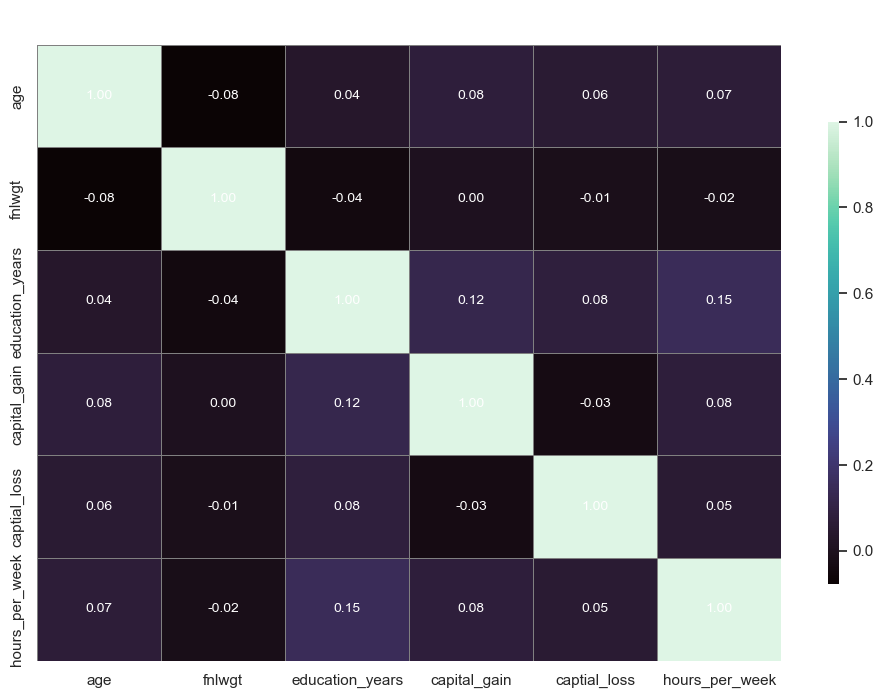

In [36]:
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for plotting graphs
# make a heatmap to visualize correlations
# Set dark background theme
sns.set_theme(style="dark")

# Create the figure with a larger size for better readability
plt.figure(figsize=(12, 8))

# Generate the heatmap with enhanced styling
ax = sns.heatmap(
    df2.select_dtypes(include=['number']).corr(),  # Select numerical columns and compute correlation
    annot=True,  # Show values
    cmap="mako",  # Dark-friendly colormap
    fmt=".2f",  # Format values to 2 decimal places
    linewidths=0.5,  # Add small gaps between cells
    linecolor="gray",  # Set line color for better visibility
    annot_kws={"size": 10, "color": "white"},  # Change annotation size and color
    cbar_kws={"shrink": 0.75, "aspect": 40},  # Adjust color bar size
)

# Customize the title for better visibility
plt.title("Correlation Matrix", fontsize=14, color="white", fontweight="bold", pad=15)

# Display the heatmap
plt.show()

In [38]:
#there are no real correlations

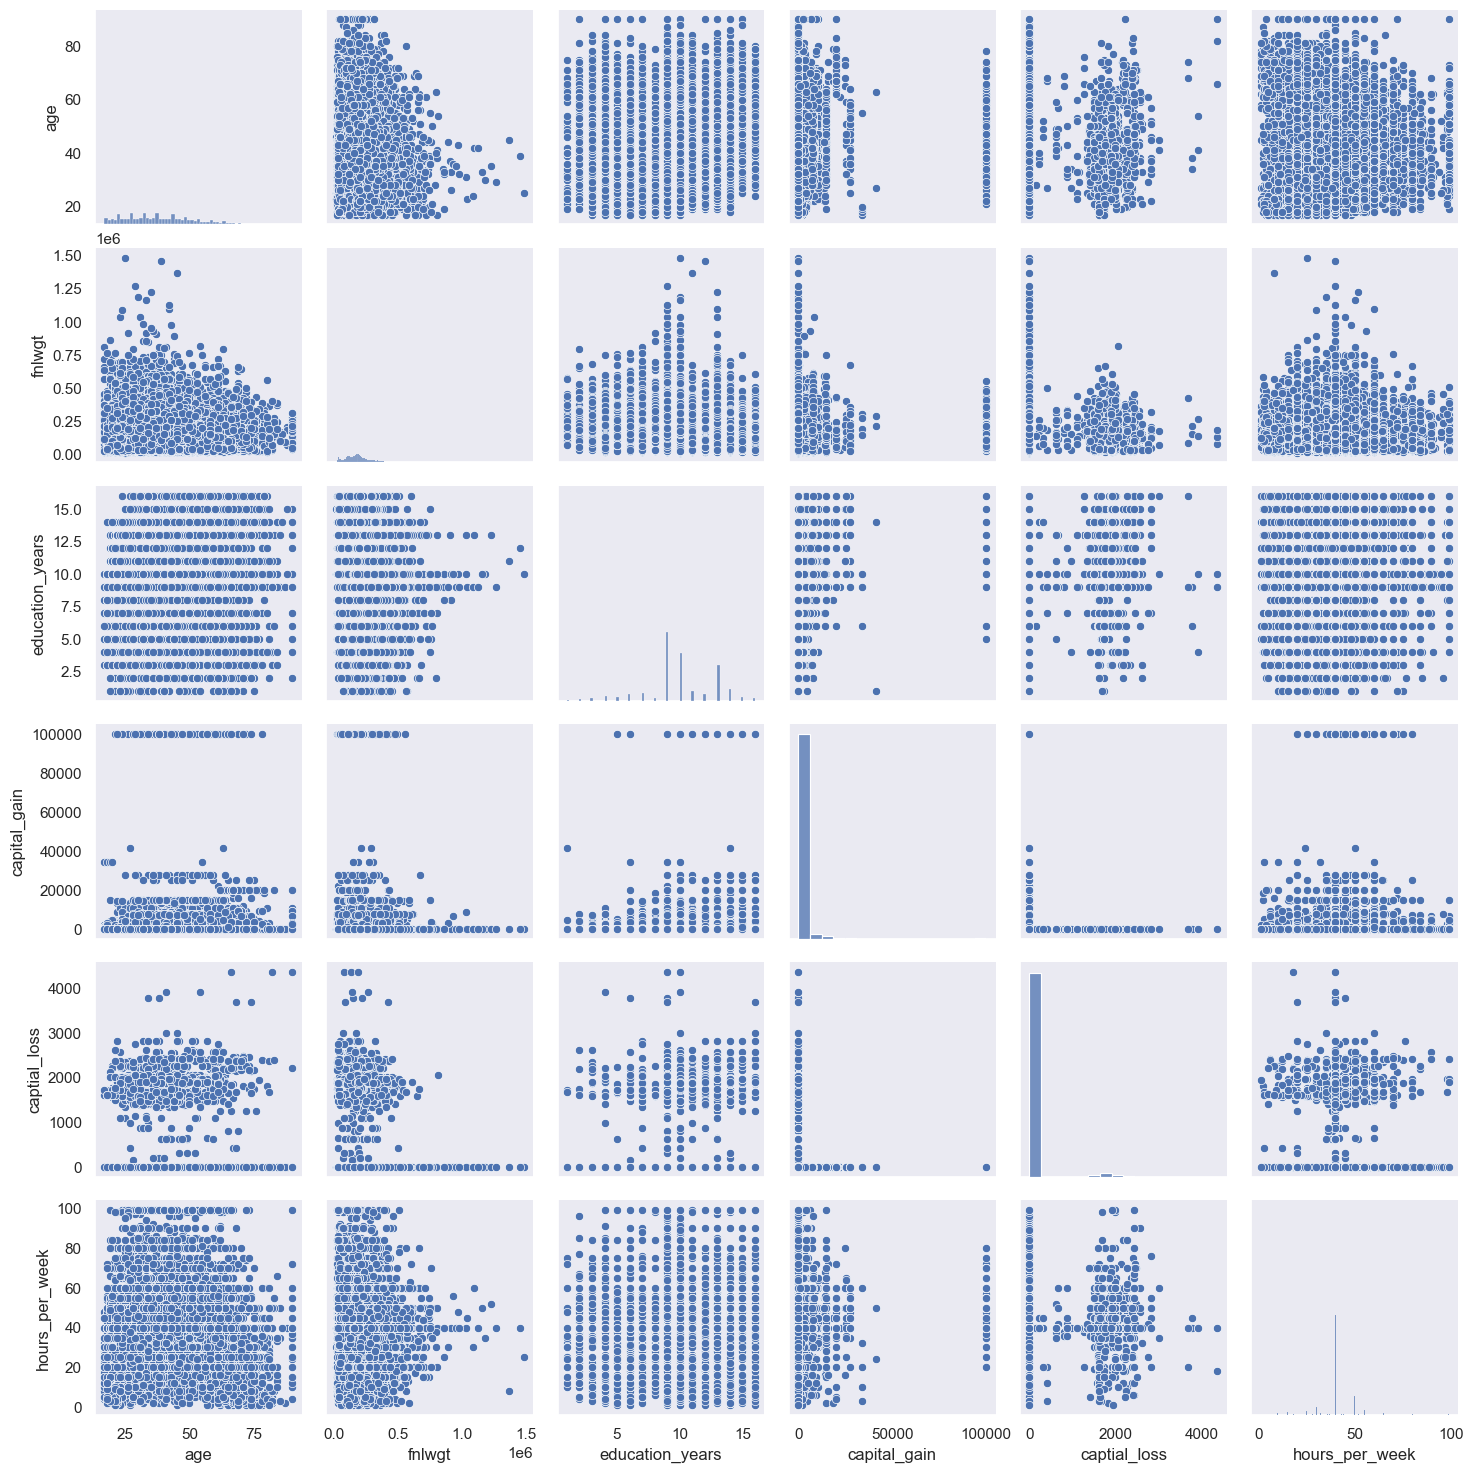

In [41]:
sns.pairplot(df2.select_dtypes(include=['number']))
plt.show()

# Test Machine Learning models

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [49]:
df2.head()


,age,workclass,fnlwgt,education,education_years,marital_status,occupation,relationship,fam,sex,capital_gain,captial_loss,hours_per_week,country,salary_relative,salary
0,39,State gov,77516,Bachelors,13,Never married,Adm clerical,Not-in-family,White,Male,2174,0,40,United States,small,<=50K
1,50,Self emp not inc,83311,Bachelors,13,Married civ spouse,Exec managerial,Husband,White,Male,0,0,13,United States,small,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers cleaners,Not-in-family,White,Male,0,0,40,United States,small,<=50K
3,53,Private,234721,11th,7,Married civ spouse,Handlers cleaners,Husband,Black,Male,0,0,40,United States,small,<=50K
4,28,Private,338409,Bachelors,13,Married civ spouse,Prof specialty,Wife,Black,Female,0,0,40,Cuba,small,<=50K


In [52]:
# Encode categorical variables
categorical_cols = ["sex", "fam", "marital_status", "occupation",
                    "education", "workclass", "relationship", "country", "salary_relative"]

label_encoders = {} #store future encoders
for col in categorical_cols:
    le = LabelEncoder() #initialize
    df2[col] = le.fit_transform(df2[col]) #transform to numerical format
    label_encoders[col] = le 

In [62]:
# What is the target variable? - relative salary
X = df2.drop(columns=["salary_relative","salary"])
y = df2["salary_relative"]
X

,age,workclass,fnlwgt,education,education_years,marital_status,occupation,relationship,fam,sex,capital_gain,captial_loss,hours_per_week,country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [64]:
y

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: salary_relative, Length: 32561, dtype: int32

In [66]:
#Standardize values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.03067056,  1.87693787, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.25767348],
       [ 0.83710898,  1.17647971, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.25767348],
       [-0.04264203, -0.22443659,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.25767348],
       ...,
       [ 1.42360965, -0.22443659, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.25767348],
       [-1.21564337, -0.22443659,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.25767348],
       [ 0.98373415,  0.47602156,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.25767348]])

In [69]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (26048, 14)
Testing set shape: (6513, 14)


# 1. Logistic Regression

In [74]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8261937663135268
              precision    recall  f1-score   support

           0       0.72      0.46      0.56      1571
           1       0.85      0.94      0.89      4942

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.82      0.83      0.81      6513



# 2. Random Forest

In [79]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8619683709504069
              precision    recall  f1-score   support

           0       0.74      0.65      0.70      1571
           1       0.89      0.93      0.91      4942

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



# 3. Support Vector Model

In [84]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8533701827115001
              precision    recall  f1-score   support

           0       0.77      0.56      0.65      1571
           1       0.87      0.95      0.91      4942

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.78      6513
weighted avg       0.85      0.85      0.84      6513



# 4. KNN

In [89]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8352525717795178
              precision    recall  f1-score   support

           0       0.68      0.60      0.64      1571
           1       0.88      0.91      0.89      4942

    accuracy                           0.84      6513
   macro avg       0.78      0.75      0.76      6513
weighted avg       0.83      0.84      0.83      6513



In [91]:
# Compare all models
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn)
}

# Print accuracy of each model
for model, accuracy in models.items():
    print(f"{model}: {accuracy:.4f}")

Logistic Regression: 0.8262
Random Forest: 0.8620
SVM: 0.8534
KNN: 0.8353


In [95]:
#Random Forest worked best

# Since Random Forest performed best, it will be further optimized with GridSearchCV

In [102]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200], #number of decision trees in the forest
    'max_depth': [10, 20], #maximum depth
    'min_samples_split': [2, 5], #minimum of smaples required to split a node
    'min_samples_leaf': [1, 2], #minimum number of samples at a leaf node
    'max_features': ['sqrt', 'log2'], #number of features considered at each split
    'bootstrap': [True, False] #whether boostrap is used
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [104]:
# Train Random Forest with the best parameters found from GridSearchCV
best_rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    bootstrap=grid_search.best_params_['bootstrap'],
    random_state=42
)

# Train the optimized model on training data
best_rf.fit(X_train, y_train)

# Make predictions on test data
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate optimized model performance
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Optimized Random Forest Accuracy: 0.8661139259941655
              precision    recall  f1-score   support

           0       0.78      0.63      0.69      1571
           1       0.89      0.94      0.91      4942

    accuracy                           0.87      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513



C:\Users\Sabrina\AppData\Local\Temp\ipykernel_19100\3189800466.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


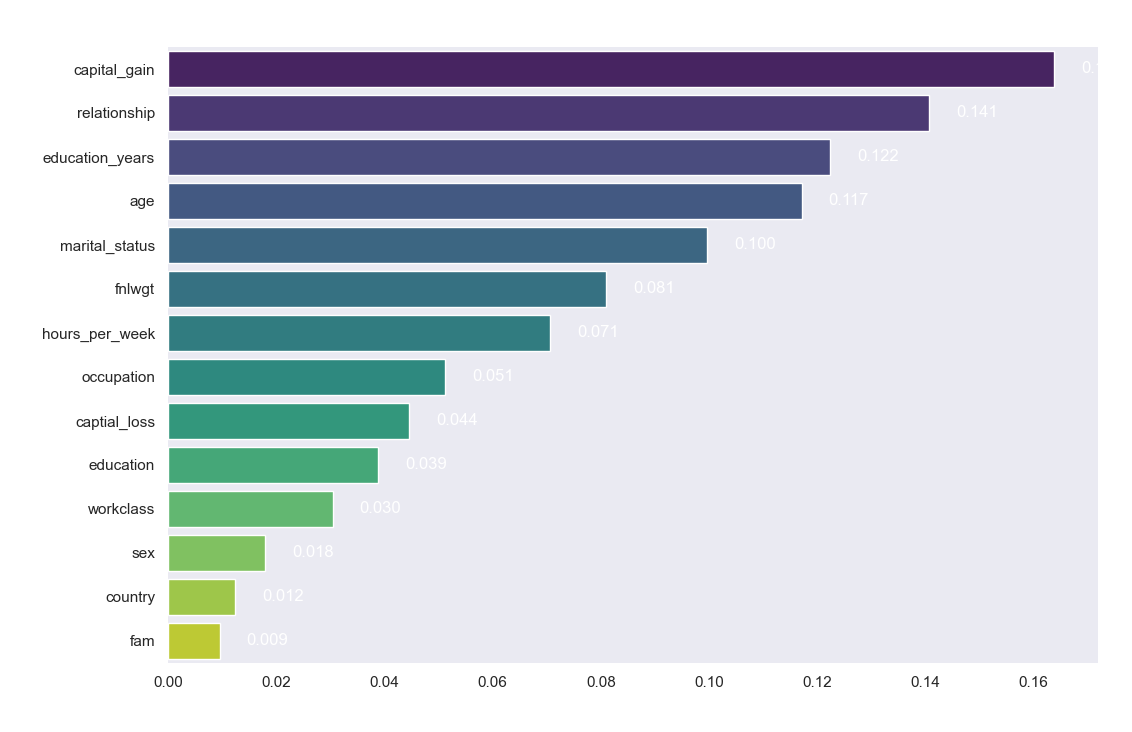

In [106]:
# Get feature importances from the trained Random Forest model
importances = best_rf.feature_importances_

# Create a dataframe for better visualization
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance as a bar chart
# Set dark background theme
sns.set_theme(style="dark")

# Create the figure
plt.figure(figsize=(12, 8))  # Slightly larger for readability

# Create a color palette based on importance values
colors = sns.color_palette("viridis", len(feature_importance_df))

# Generate the bar plot with enhanced styling
ax = sns.barplot(
    x=feature_importance_df["Importance"], 
    y=feature_importance_df["Feature"], 
    palette=colors  # Apply gradient color
)

# Add data labels on bars
for index, value in enumerate(feature_importance_df["Importance"]):
    ax.text(value + 0.005, index, f"{value:.3f}", color="white", fontsize=12, va="center")

# Customize the title
plt.title("Feature Importance in Random Forest Model", fontsize=16, color="white", fontweight="bold", pad=15)

# Customize axis labels
plt.xlabel("Importance", fontsize=14, color="white", labelpad=10)
plt.ylabel("Feature", fontsize=14, color="white", labelpad=10)

# Remove borders for a cleaner look
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


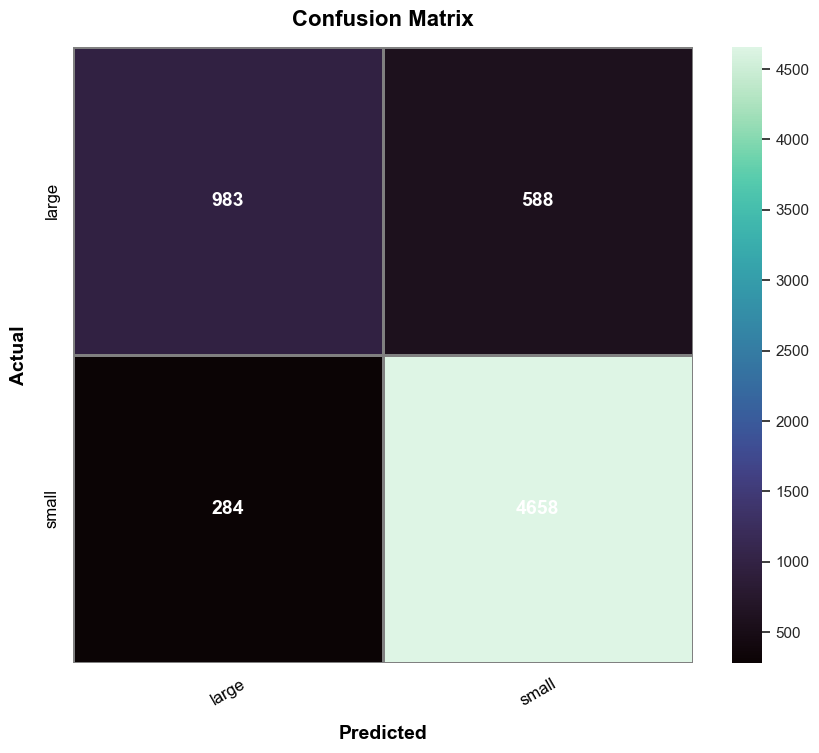

In [108]:
# Generate confusion matrix to analyze model predictions
cm = confusion_matrix(y_test, y_pred_best_rf)

# Plot the confusion matrix using a heatmap
# Set dark background theme
sns.set_theme(style="dark")

# Create figure
plt.figure(figsize=(10, 8))  # Slightly larger for readability

# Generate heatmap with improved styling
ax = sns.heatmap(
    cm,  # Confusion matrix data
    annot=True,  # Show numbers
    fmt='d',  # Integer format
    cmap="mako",  # Dark-friendly colormap
    linewidths=1,  # Add spacing between cells
    linecolor="gray",  # Light gray borders for better visibility
    annot_kws={"size": 14, "color": "white", "weight": "bold"},  # Larger, bolder, white annotations
    xticklabels=label_encoders['salary_relative'].classes_,  # Set x-axis labels
    yticklabels=label_encoders['salary_relative'].classes_   # Set y-axis labels
)

# Customize axes labels
plt.xlabel("Predicted", fontsize=14, color="black", labelpad=12, fontweight="bold")
plt.ylabel("Actual", fontsize=14, color="black", labelpad=12, fontweight="bold")

# Customize title
plt.title("Confusion Matrix", fontsize=16, color="black", fontweight="bold", pad=15)

# Rotate x-axis labels slightly for better readability
plt.xticks(rotation=30, fontsize=12, color="black")
plt.yticks(fontsize=12, color="black")

# Show the plot
plt.show()


In [110]:
from imblearn.over_sampling import SMOTE  # For handling class imbalance (if needed)
# Initialize SMOTE to balance the dataset
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train a new Random Forest model on the balanced dataset
rf_balanced = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
rf_balanced.fit(X_train_sm, y_train_sm)

# Make predictions on test data
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluate model trained on balanced data
print("Balanced Random Forest Accuracy:", accuracy_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


Balanced Random Forest Accuracy: 0.8392445877475817
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1571
           1       0.93      0.86      0.89      4942

    accuracy                           0.84      6513
   macro avg       0.78      0.82      0.80      6513
weighted avg       0.86      0.84      0.84      6513



In [112]:
# Compare accuracy of different models
models = {
    "Baseline RF": accuracy_score(y_test, y_pred_rf),
    "Optimized RF": accuracy_score(y_test, y_pred_best_rf),
    "Balanced RF": accuracy_score(y_test, y_pred_balanced)
}

# Print accuracy for each model
for model, accuracy in models.items():
    print(f"{model}: {accuracy:.4f}")


Baseline RF: 0.8620
Optimized RF: 0.8661
Balanced RF: 0.8392


# The optimized Random Forrest model performed best